In [1]:
import numpy as np
from qiskit import(
    QuantumCircuit,
    execute,
    Aer)
from qiskit.visualization import plot_histogram

In [2]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [3]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

In [4]:
# Add a H gate on qubit 0
circuit.h(0)

In [5]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

In [6]:
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

In [7]:
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 494, '11': 506}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

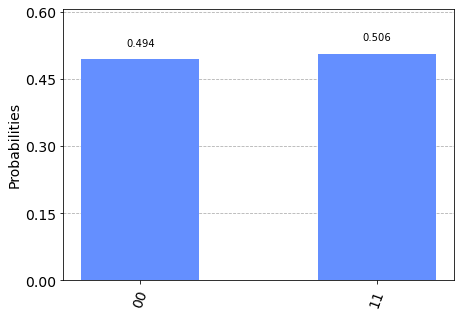

In [9]:
# Plot a histogram
plot_histogram(counts)